In [3]:
import pandas as pd

In [9]:
%pip install -U google-cloud-bigquery pandas pyarrow db-dtypes


  Using cached pyarrow-21.0.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 40.2 MB/s  0:00:00eta 0:00:01
Using cached pyarrow-21.0.0-cp311-cp311-macosx_12_0_arm64.whl (31.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/17 [google-cloud-bigquery]le-cloud-bigquery]
Note: you may need to restart the kernel to use updated packages.


In [11]:
from google.cloud import bigquery
from google.oauth2 import service_account

# 1) (권장) 서비스 계정
# creds = service_account.Credentials.from_service_account_file("/path/key.json")
# client = bigquery.Client(project="YOUR_PROJECT_ID", credentials=creds)

# 2) 또는 gcloud 로컬 로그인 사용
#   gcloud auth application-default login
client = bigquery.Client(project="bubbly-axiom-470206")

sql = """
SELECT *
FROM `test_ad_list.ads_domain_list`
ORDER BY row_id
"""
df = client.query(sql).to_dataframe()  # CSV 없이 바로 DF
print(df.head())

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [26]:
ads_domain = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")

In [27]:
ads_domain

,ml_generate_text_llm_result,ml_generate_text_rai_result,ml_generate_text_status,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,prompt,result
0,금융\n,NaN,NaN,4865,6508,3u4lOKJAek,13,335,3,10,...,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:스마...,금융\n
1,금융\n,NaN,NaN,5343,6985,SijDrtH4GV,13,335,3,7,...,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:DB...,금융\n
2,미디어/컨텐츠\n,NaN,NaN,6729,8327,k1RZftVHoW,13,335,3,10,...,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:파일...,미디어/컨텐츠\n
3,금융\n,NaN,NaN,7675,9264,EGZcaVOtlc,23,220,3,10,...,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:하나...,금융\n
4,생활\n,NaN,NaN,8126,9716,NwZZq45Kgb,6,10,3,8,...,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:베이...,생활\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,커머스\n,NaN,NaN,17290185,446899,U80Aed1tRq,86,1655,3,4,...,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,2025-08-25 09:37:27 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:원스...,커머스\n
9513,**식당/카페**\n,NaN,NaN,17290248,446900,dfX4EjOsTE,86,1655,3,4,...,0,100,7,18,12,1369915,ADS_CODE_DAILY_UPDATE,2025-08-25 09:42:08 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:서빙...,**식당/카페**\n
9514,미디어/컨텐츠\n,NaN,NaN,17290308,446902,rc7EZrAoQw,57,84,3,8,...,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:[네...,미디어/컨텐츠\n
9515,금융\n,NaN,NaN,17290315,446908,HRMcs0VIjL,13,335,2,0,...,0,100,2,230,180,1682806,NONE,2025-08-25 10:37:10 UTC,다음 광고 정보를 보고 가장 적합한 도메인을 하나만 선택해주세요.\n광고 이름:NO...,금융\n


In [19]:
import re

# 앞뒤 공백/개행/별표 제거 → "식당카페", "**식당/카페**\n" 같은 변형도 먼저 정리
ads_domain["result"] = (ads_domain["result"].astype(str)
    .str.replace(r'(\\n|[\r\n])+', '', regex=True)   # 실제/리터럴 개행 제거
    .str.replace(r'^\*+|\*+$', '', regex=True)       # 앞뒤 ** 제거
    .str.strip()
)

# "식당카페", "식당 / 카페", "식당/카페" 등 모두 표준 라벨로 통일
mask = ads_domain["result"].str.contains(r'^\s*식당\s*/?\s*카페\s*$', regex=True, na=False)
ads_domain.loc[mask, "result"] = "식당/카페"

In [17]:
ads_domain['result'].unique()

array(['금융\n', '미디어/컨텐츠\n', '생활\n', '게임\n', '뷰티\n', '커머스\n', '식음료\n',
       '운동/스포츠\n', '의료/건강\n', '운세\n', '식당/카페\n', '교육\n', '정답: 게임\n',
       '채용\n',
       '**미디어/컨텐츠**\n\n**이유:**\n\nMyB 앱이 어떤 종류의 앱인지 구체적으로 알 수 없지만, "MyB을 내려받고 오픈하세요!"라는 문구와 광고 추적 허용 동의가 필요한 점을 고려했을 때, 앱 자체가 미디어 콘텐츠를 제공하거나, 다른 미디어 콘텐츠를 이용하기 위한 플랫폼일 가능성이 높습니다. 예를 들어, 웹툰 플랫폼, 음악 스트리밍 앱, 뉴스 앱 등이 이에 해당될 수 있습니다.\n',
       "**생활**\n\n**이유:**\n\n*   **범죄 알리미:** 안전과 관련된 서비스로, '생활' 카테고리에 적합합니다.\n*   **무료 체험 후 유료 결제:** 생활 서비스에서 흔히 볼 수 있는 비즈니스 모델입니다.",
       '**생활**\n\n**이유:**\n\n*   **소개팅 앱:** 광고 내용에서 "계정 생성" 및 "심사 요청"이라는 부분이 강조되는 것으로 보아, 이는 새로운 사용자를 확보하려는 소개팅 앱의 특징과 일치합니다.\n*   **연령 제한:** 만 19세~43세 이하로 계정 생성을 제한하는 것 또한 소개팅 앱에서 흔히 볼 수 있는 특징입니다.',
       '**생활**\n', '**식음료**\n',
       '**게임**\n\n**이유:**\n\n*   광고 이름에 "퍼즐"이 포함되어 있으며, 광고 요약에서 "정렬 모험"이라는 표현을 사용하고 있습니다.\n*   광고 내용 자체가 앱 설치 후 게임 플레이를 통해 특정 목표(코인 30,000개 모으기)를 달성하는 것을 조건으로 하고 있습니다.\n*   도메인 분류 기준에서 "RPG, 길드, 레벨업, 아이템, 캐릭터, 던전, 퀘스트, 전투, 스킬, 가챠, 뽑기" 등의 키워드가',
    

# 매체사별

In [6]:
time_info = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_시간별적립보고서(최종).csv")

In [8]:
time_info

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말
...,...,...,...,...,...,...,...,...,...,...
279911,2025-08-25,11,446855,563,15,2,36,28,0,주중
279912,2025-08-25,11,446902,270,1,0,0,0,0,주중
279913,2025-08-25,11,446909,562,3,2,36,28,0,주중
279914,2025-08-25,11,446909,563,51,7,126,98,0,주중


# 유저

In [28]:
participate = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_광고참여정보.csv")

In [29]:
participate

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,2025-09-19,NaN,43.206.110.22
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142


In [30]:
rewards = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/수정_광고적립.csv")

In [31]:
rewards

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475026,239780599,356956,1UNE1La9yv,270,1,35431157,56296bc1-c155-4fa7-9888-72b195653deb,3dc358e1a2b6a3480ba45dc65f81a308bc6c5e70,5,3,2025-08-25 11:32:34,2025-08-25 11:32:44,10
1475027,239780621,445907,0gEJGntDo3,794,1,62076634,d46f85a9-e8e0-4017-8354-e93b0ffc5ffe,d3a189157fc1c3b458b44e485a38ad544b89402d,170,30,2025-08-25 11:32:37,2025-08-25 11:34:29,112
1475028,239780617,446855,yrwq08KCov,563,1,60605730,666272a3-4181-4635-84e7-de1df1008ace,c752e95c5a236c8799cbcf4dc516b7e09e1afda7,18,14,2025-08-25 11:32:47,2025-08-25 11:33:55,68
1475029,239780609,446837,2hznDD8Yx3,371,1,46271340,c91a2823-8a33-4d36-8900-966448fd0e56,4dc015e177c38a9d2d0cf65d2b2e146e79352683,13,9,2025-08-25 11:33:07,2025-08-25 11:33:15,8


In [38]:
# 참여정보 적립 정보 조인

# rewards에서 click_key 외의 겹치는 컬럼들 제거
overlap_cols = set(participate.columns) & set(rewards.columns) - {'click_key'}
rewards_clean = rewards.drop(columns=overlap_cols)

records = participate.merge(rewards_clean, on='click_key', how='left')

In [39]:
records['conversion'] = records['ctit'].notna().astype(int)
records

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,...,0,122.32.24.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,...,0,13.125.212.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,...,NaN,43.206.110.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,...,0,115.40.102.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [67]:
records.to_csv("참여적립조인.csv")

In [42]:
# records 컬럼 리스트
records.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx', 'ads_code',
       'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit', 'conversion'],
      dtype='object')

In [43]:
ads_list = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")

In [ ]:
# 도메인명 정제

ads_list = pd.read_csv("/Users/Jiwon/Documents/GitHub/final_project/Jiwon/광고도메인.csv")
ads_list

import re
import pandas as pd

ALLOWED = [
    "게임","뷰티","커머스","의료/건강","금융","미디어/컨텐츠","식음료","생활",
    "채용","운세","식당/카페","운동/스포츠","교육","비영리/공공","기타"
]

PATTERNS = [
    (r'\b게임\b', "게임"),
    (r'\b뷰티\b', "뷰티"),
    (r'\b커머스\b', "커머스"),
    (r'의료\s*/?\s*건강', "의료/건강"),
    (r'\b금융\b', "금융"),
    (r'미디어\s*/?\s*[컨콘]텐츠|미디어콘텐츠', "미디어/컨텐츠"),
    (r'\b식음료\b', "식음료"),
    (r'\b생활\b', "생활"),
    (r'\b채용\b', "채용"),
    (r'\b운세\b', "운세"),
    (r'식당\s*/?\s*카페|식당카페', "식당/카페"),
    (r'운동\s*/?\s*스포츠|운동스포츠', "운동/스포츠"),
    (r'\b교육\b', "교육"),
    (r'비영리\s*/?\s*공공', "비영리/공공"),
    (r'\b기타\b', "기타"),
]

def normalize_domain(text: str) -> str:
    if pd.isna(text):
        return "기타"
    s = str(text)

    # 1) JSON 형태면 값만 추출
    m = re.search(r'"domain"\s*:\s*"([^"]+)"', s)
    if m:
        s = m.group(1)

    # 2) 포매팅/개행 제거
    s = re.sub(r'(\\n|[\r\n])+', ' ', s)           # 개행 제거
    s = re.sub(r'[`"*#]+', '', s)                 # 서식문자 제거
    s = s.strip()

    # 3) 허용 라벨 패턴 찾기
    for pat, lab in PATTERNS:
        if re.search(pat, s):
            return lab

    # 4) 라벨명이 정확히 쓰인 경우(여분 텍스트 동반)
    for lab in ALLOWED:
        if lab in s:
            return lab

    return "기타"

# 사용: df["result"] → 표준라벨
ads_list["domain"] = ads_list["domain"].apply(normalize_domain)

In [49]:
ads_list['domain'].unique()

array(['금융', '미디어/컨텐츠', '생활', '게임', '뷰티', '커머스', '식음료', '운동/스포츠', '의료/건강',
       '운세', '식당/카페', '교육', '채용', '기타', '비영리/공공'], dtype=object)

In [54]:
ads_list['domain'].isna().mean()

np.float64(0.0)

In [55]:
ads_list.to_csv("광고도메인리스트.csv")

In [56]:
ads_list.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order',
       'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [ ]:
ads_list_cln = ads_list.copy()

ads_list_cln = ads_list.drop

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",서비스 가입,...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,내차 보험료 조회,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,첫 결제,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,보험 가입 완료,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,참여신청 (25세 ~ 55세),...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,446899,U80Aed1tRq,86,1655,3,4,원스토몰 180212,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 4번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,2025-08-25 09:37:27 UTC,커머스
9513,446900,dfX4EjOsTE,86,1655,3,4,서빙카트 식당 업소용 주방 서빙카 다용도 서빙카트 소형 2단 기본고무바퀴 180213,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369915,ADS_CODE_DAILY_UPDATE,2025-08-25 09:42:08 UTC,식당/카페
9514,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15 UTC,미디어/컨텐츠
9515,446908,HRMcs0VIjL,13,335,2,0,NOL,https://seimg.pincrux.com/icon/1756085578.5054...,[참여방법]\n- 앱에 접속하시면 리워드가 지급됩니다.\n\n[주의사항]\n- 리워...,최초 오픈,...,9999-12-31 23:59:59,0,100,2,230,180,1682806,NONE,2025-08-25 10:37:10 UTC,금융


In [57]:
ads_list['ads_save_way'].unique()

array(['서비스 가입', '내차 보험료 조회', '첫 결제', '보험 가입 완료', '참여신청 (25세 ~ 55세)',
       '포인트로 영화예매권 교환', '네이버 뉴스 구독', '최초 설치 후 레벨 27 달성', '구매', '캐릭터 생성',
       '모든 서브퀘스트 완료', '팔로우 후 친한 친구 리스트 추가', '회원가입 후 로그인', '최초 회원가입', '받기',
       '이벤트 참여', '스크린샷 업로드', '보험가입', '무료체험 신청', '최초 결제',
       '회원가입 및 무료이용권 사용', '회원가입', '최초 오픈 후 금융자산 연결', '영화할인권 무료교환', '좋아요',
       '네이버뉴스 구독', '서비스 가입 ', '가입', '구독 + 좋아요', '7일간 무료체험 신청',
       '레벨 100 클리어', '7000코인 획득', '레벨100 클리어', '레벨 70 달성',
       '3초 퀴즈 후 카카오 로그인', '이벤트 참여 완료', '견적조회', '계정생성 후 심사요청', '참여',
       '카카오톡 채널추가', '참여 하기', '컴퓨터화 제재소에 도달', '구독 및 좋아요', '최초 회원가입+성인인증',
       '최초 오픈', '팔로우', 'KB다이렉트 간편실손보험 가입', 'KB다이렉트 암보험 가입',
       'KB다이렉트 운전자보험 가입', 'KB다이렉트 자녀보험 가입', 'Mission 60 달성', '20초 이상 체류',
       '상담', '미래에셋증권 계좌개설 완료', '계정 생성 후 심사요청 진행', '100레벨 클리어',
       '조회된 휴면포인트로 영화티켓 교환', '상담신청', '만기알림 서비스 신청', '3,500점 달성하기',
       '가입 후 상승유망주 매일 1종목씩 받기', '내 보험금 확인하기', '머니트리카드 신청', '월 자동결제',
       '반려동물 등록', '한게임 포커 최초 가입 후 7포커 15판 플레이 완료 시 ', '

## min max 나이 분석해보기

In [65]:
print(ads_list[['ads_age_min', 'ads_age_max']].describe())
print("\n")
print(ads_list[['ads_age_min', 'ads_age_max']].isna().sum())

       ads_age_min  ads_age_max
count  9517.000000  9517.000000
mean      0.059998    99.908480
std       1.173690     2.204768
min       0.000000    34.000000
25%       0.000000   100.000000
50%       0.000000   100.000000
75%       0.000000   100.000000
max      30.000000   100.000000


ads_age_min    0
ads_age_max    0
dtype: int64


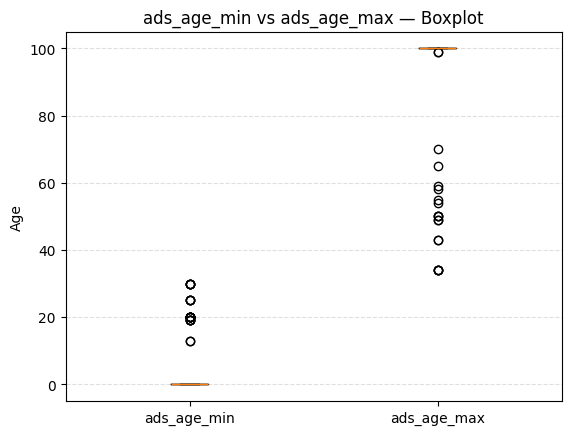

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 숫자형 보정
min_col = pd.to_numeric(ads_list["ads_age_min"], errors="coerce").dropna()
max_col = pd.to_numeric(ads_list["ads_age_max"], errors="coerce").dropna()

plt.figure()
plt.boxplot([min_col, max_col], showfliers=True)  # 이상치 표시
plt.xticks([1, 2], ["ads_age_min", "ads_age_max"])
plt.ylabel("Age")
plt.title("ads_age_min vs ads_age_max — Boxplot")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

## 테이블 만들기

In [74]:
ads_list_cln = ads_list.copy()

ads_list_cln = ads_list_cln.drop(columns=['ads_code', 'aff_idx', 'adv_idx',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_contract_price',  'regdate'])

In [ ]:
ads_list_cln

,ads_idx,ads_type,ads_category,ads_os_type,ads_reward_price,ads_order,ads_rejoin_type,domain
0,6508,3,10,7,1100,2381500,NONE,금융
1,6985,3,7,7,2300,1201938,NONE,금융
2,8327,3,10,7,2420,1673458,NONE,미디어/컨텐츠
3,9264,3,10,7,8250,2372800,NONE,금융
4,9716,3,8,2,480,2699900,NONE,생활
...,...,...,...,...,...,...,...,...
9512,446899,3,4,7,12,1369916,ADS_CODE_DAILY_UPDATE,커머스
9513,446900,3,4,7,12,1369915,ADS_CODE_DAILY_UPDATE,식당/카페
9514,446902,3,8,7,150,2735900,NONE,미디어/컨텐츠
9515,446908,2,0,2,180,1682806,NONE,금융


In [76]:
records = records.merge(ads_list_cln, on='ads_idx', how='left')

In [77]:
records

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,...,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_reward_price,ads_order,ads_rejoin_type,domain
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,...,NaN,NaN,0,3,5,2,4500,2447700,NONE,게임
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,...,2025-07-26 02:19:21,57.0,1,1,2,2,120,2749100,NONE,게임
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,...,2025-08-12 18:19:21,82.0,1,1,0,2,120,2758100,NONE,생활
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,...,NaN,NaN,0,3,5,2,4500,2449700,NONE,게임
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,...,NaN,NaN,0,3,5,2,11700,2456300,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,...,NaN,NaN,0,3,5,2,3800,2447400,NONE,게임
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,...,NaN,NaN,0,3,5,2,2700,2454600,NONE,게임
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,...,NaN,NaN,0,1,1,2,120,2763600,NONE,게임
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,...,NaN,NaN,0,3,5,2,4500,2449700,NONE,게임


In [80]:
records.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx', 'ads_code',
       'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit', 'conversion',
       'ads_type', 'ads_category', 'ads_os_type', 'ads_reward_price',
       'ads_order', 'ads_rejoin_type', 'domain'],
      dtype='object')

In [82]:
records_cln = records.copy()

records_cln = records_cln.drop(columns=['pub_sub_rel_id', 'ads_code', 'adv_cost', 'earn_cost', 'ads_reward_price'])
records_cln

,click_key,ads_idx,dvc_idx,mda_idx,contract_price,media_price,click_day,click_time,click_date,exp_day,...,advid,regdate,ctit,conversion,ads_type,ads_category,ads_os_type,ads_order,ads_rejoin_type,domain
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,...,NaN,NaN,NaN,0,3,5,2,2447700,NONE,게임
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,...,40ceb01c-9b60-4452-bacd-0e061fb18ab4,2025-07-26 02:19:21,57.0,1,1,2,2,2749100,NONE,게임
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,...,73793f44-a471-4351-ae1c-d09accaf223a,2025-08-12 18:19:21,82.0,1,1,0,2,2758100,NONE,생활
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,...,NaN,NaN,NaN,0,3,5,2,2449700,NONE,게임
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,...,NaN,NaN,NaN,0,3,5,2,2456300,NONE,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,...,NaN,NaN,NaN,0,3,5,2,2447400,NONE,게임
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,...,NaN,NaN,NaN,0,3,5,2,2454600,NONE,게임
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,180,170,2025-08-20,1,2025-08-20 01:02:48,2025-09-19,...,NaN,NaN,NaN,0,1,1,2,2763600,NONE,게임
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,...,NaN,NaN,NaN,0,3,5,2,2449700,NONE,게임


In [83]:
records_cln.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'contract_price',
       'media_price', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'user_ip', 'rwd_idx', 'advid', 'regdate', 'ctit',
       'conversion', 'ads_type', 'ads_category', 'ads_os_type', 'ads_order',
       'ads_rejoin_type', 'domain'],
      dtype='object')

In [85]:
records_cln['ads_rejoin_type'].unique()

array(['NONE', 'ADS_CODE_DAILY_UPDATE', 'REJOINABLE'], dtype=object)

In [ ]:
# 재참여 가능 비율 보기
ads_list['ads_rejoin_type'].value_counts(normalize=True).round(3)


ads_rejoin_type
ADS_CODE_DAILY_UPDATE    0.609
NONE                     0.343
REJOINABLE               0.048
Name: proportion, dtype: float64

In [90]:
ads_list['ads_os_type'].value_counts(normalize=True).round(3)

ads_os_type
7    0.945
2    0.043
1    0.012
3    0.001
Name: proportion, dtype: float64

In [92]:
print(records_cln['domain'].value_counts(normalize=True).round(3))
print(ads_list['domain'].value_counts(normalize=True).round(3))

domain
게임         0.867
금융         0.054
커머스        0.016
기타         0.013
생활         0.011
식당/카페      0.009
미디어/컨텐츠    0.009
의료/건강      0.006
채용         0.006
운세         0.003
뷰티         0.002
비영리/공공     0.002
식음료        0.001
운동/스포츠     0.001
교육         0.000
Name: proportion, dtype: float64
domain
커머스        0.294
식당/카페      0.227
생활         0.115
의료/건강      0.091
뷰티         0.054
식음료        0.045
기타         0.045
게임         0.044
운동/스포츠     0.034
미디어/컨텐츠    0.021
금융         0.018
교육         0.005
운세         0.003
비영리/공공     0.003
채용         0.001
Name: proportion, dtype: float64


In [94]:
game_list = ads_list[ads_list['domain']=='게임']
game_list = game_list.reset_index().rename(columns={"index": "row_id"})
game_list.to_csv("gamelist.csv")

In [95]:
game_list

,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,8,10500,h48Sy7DML6,6,10,3,5,판타지타운,https://nextapps-nas.aws.appang.kr/icon/202103...,대작 SNG! 판타지 마을을 경영하세요.\n\n[참여 방법]\n1. 광고 참여 버튼...,...,2029-11-29 00:00:00,0,100,2,4000,3000,2414800,NONE,2021-03-19 18:44:44 UTC,게임
1,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,2027-01-01 00:00:00,0,100,2,300,200,2097400,NONE,2021-05-03 17:23:00 UTC,게임
2,25,11123,s6D62izbyb,17,552,9,6,프린세스테일,https://w.namu.la/s/8059e237bfd290461346d7bd94...,40여 종 공주들의 귀염뽀짝 방치형 판타지 RPG,...,2025-12-31 00:00:00,0,100,2,0,429,1429100,NONE,2021-05-10 10:11:59 UTC,게임
3,41,16485,bBqgAcVlKc,1,1403,9,6,브롤스타즈,https://play-lh.googleusercontent.com/EiElcSrd...,빠르게 진행되는 3v3 모바일 멀티플레이 배틀 로얄! 3분간 진행되는 다양한 게임 ...,...,2025-12-31 00:00:00,0,100,2,0,679,1773300,NONE,2022-04-12 18:55:53 UTC,게임
4,52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,...,2025-12-31 00:00:00,0,100,2,0,571,1823000,NONE,2022-05-18 14:45:55 UTC,게임
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,9034,446088,B9pFfICL3N,71,910,3,5,네기마,https://cdnet.nasmob.com/nstation/image/202508...,"- 리워드 미지급시, 왼쪽 하단의 [파랑 모자 캐릭터] 클릭시 확인되는 ID를 문의...",...,2029-11-29 00:00:00,0,100,2,15000,11250,2470800,NONE,2025-08-21 13:58:08 UTC,게임
416,9051,446111,wbtGIkyiYA,84,1623,3,4,인형뽑기기계,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,9999-12-31 23:59:59,0,100,7,15,10,1369936,NONE,2025-08-21 15:27:19 UTC,게임
417,9076,446139,1TbomruzNy,84,1623,3,4,출차주의등,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,9999-12-31 23:59:59,0,100,7,15,10,1369936,NONE,2025-08-22 00:09:33 UTC,게임
418,9159,446268,8ebAq9yQDL,13,335,1,2,데몬 소서리스 키우기:방치형 RPG,https://seimg.pincrux.com/icon/1755824514.448_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,...,2029-11-29 00:00:00,0,100,2,130,90,2763200,NONE,2025-08-22 11:02:58 UTC,게임


In [96]:
pip install rapidfuzz

python(8359) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.7 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [97]:
import re
import time
import json
import urllib.parse
import requests
import pandas as pd
from rapidfuzz import fuzz

# ------------------------------
# 0) 장르 매핑 테이블
# ------------------------------
APPLE_GENRE_TO_U19_KO = {
    "Action":"액션","Adventure":"어드벤처","Arcade":"아케이드","Board":"보드",
    "Card":"카드","Casino":"카지노","Casual":"캐주얼","Dice":"주사위",
    "Educational":"교육","Family":"가족","Music":"음악","Puzzle":"퍼즐",
    "Racing":"레이싱","Role Playing":"RPG","Simulation":"시뮬레이션",
    "Sports":"스포츠","Strategy":"전략","Trivia":"퀴즈","Word":"단어"
}

U19_TO_U6_KO = {
    "RPG":"RPG/어드벤처", "어드벤처":"RPG/어드벤처",
    "액션":"액션/아케이드/슈팅", "아케이드":"액션/아케이드/슈팅",
    "전략":"전략/시뮬레이션", "시뮬레이션":"전략/시뮬레이션",
    "스포츠":"스포츠/레이싱", "레이싱":"스포츠/레이싱",
    "퍼즐":"퍼즐/보드/카드/카지노/퀴즈/단어", "보드":"퍼즐/보드/카드/카지노/퀴즈/단어",
    "카드":"퍼즐/보드/카드/카지노/퀴즈/단어", "카지노":"퍼즐/보드/카드/카지노/퀴즈/단어",
    "퀴즈":"퍼즐/보드/카드/카지노/퀴즈/단어", "단어":"퍼즐/보드/카드/카지노/퀴즈/단어",
    "캐주얼":"캐주얼/하이퍼캐주얼/아이들", "주사위":"캐주얼/하이퍼캐주얼/아이들",
    "교육":"캐주얼/하이퍼캐주얼/아이들", "가족":"캐주얼/하이퍼캐주얼/아이들",
    "음악":"캐주얼/하이퍼캐주얼/아이들"
}

# ------------------------------
# 1) 유틸: 문자열 정규화 & 연령 등급 표준화
# ------------------------------
def _norm(s: str) -> str:
    s = (s or "").lower()
    s = re.sub(r'[\(\[\{].*?[\)\]\}]', '', s)   # 괄호 안 부제목 제거
    s = re.sub(r'[:\-–|].*$', '', s)            # 콜론/대시 뒤 부제목 제거
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def _age_to_int(label: str):
    if not label:
        return None
    s = label.strip().lower()
    # iOS: '4+', '9+', '12+', '17+'
    m = re.search(r'(\d+)\s*\+?', s)
    if m:
        return int(m.group(1))
    # 혹시 한글/IARC 형식이 들어와도 커버
    s = s.replace('이상','').replace('이용가','').replace('세','').replace('만','').strip()
    m = re.search(r'\d+', s)
    return int(m.group()) if m else None

# ------------------------------
# 2) iTunes Search / Lookup
# ------------------------------
def ios_search(name: str, country="kr", limit=5):
    q = urllib.parse.quote(name)
    url = f"https://itunes.apple.com/search?country={country}&media=software&entity=software&limit={limit}&term={q}"
    r = requests.get(url, timeout=10)
    r.raise_for_status()
    return r.json().get("results", [])

def ios_lookup_by_bundle(bundle_id: str):
    url = f"https://itunes.apple.com/lookup?bundleId={bundle_id}"
    r = requests.get(url, timeout=10)
    r.raise_for_status()
    return r.json().get("results", [])

def _best_candidate(app_name: str, candidates: list):
    """제목 유사도 기반 최적 후보 선택"""
    target = _norm(app_name)
    best = (0, None)
    for c in candidates:
        title = _norm(c.get("trackName",""))
        score = max(
            fuzz.token_set_ratio(target, title),
            fuzz.partial_ratio(target, title)
        )
        # 보너스: Games 분류면 +2
        if "Games" in c.get("genres", []):
            score += 2
        if score > best[0]:
            best = (score, c)
    return best  # (score, candidate)

# ------------------------------
# 3) 후보 → 메타 파싱 (장르/연령)
# ------------------------------
def _parse_ios_meta(cand: dict):
    genres_en = cand.get("genres") or []  # ['Games','Role Playing', ...]
    # iOS는 'Games'와 세부 장르가 같이 옵니다. 세부 장르들 중 첫 매칭 사용.
    u19 = None
    for g in genres_en:
        if g in APPLE_GENRE_TO_U19_KO:
            u19 = APPLE_GENRE_TO_U19_KO[g]
            break
    # 없으면 primaryGenreName이 세부 장르일 수 있어 체크
    if not u19:
        pg = cand.get("primaryGenreName")
        if pg in APPLE_GENRE_TO_U19_KO:
            u19 = APPLE_GENRE_TO_U19_KO[pg]
    # 그래도 없으면 '캐주얼'로 폴백(혹은 None 유지)
    u19 = u19 or "캐주얼"
    u6  = U19_TO_U6_KO.get(u19, "캐주얼/하이퍼캐주얼/아이들")

    return {
        "ios_trackId": cand.get("trackId"),
        "ios_bundleId": cand.get("bundleId"),
        "ios_title": cand.get("trackName"),
        "ios_seller": cand.get("sellerName"),
        "ios_primaryGenreName": cand.get("primaryGenreName"),
        "ios_genres_raw": ",".join(genres_en),
        "genre_u19": u19,
        "genre_u6": u6,
        "age_label_ios": cand.get("contentAdvisoryRating"),
        "age_min_ios": _age_to_int(cand.get("contentAdvisoryRating"))
    }

# ------------------------------
# 4) 메인: ads_name → iOS 메타 매핑
# ------------------------------
def map_ads_names_with_ios(df: pd.DataFrame, name_col="ads_name",
                           country="kr", score_threshold=85, sleep_sec=0.2):
    """
    df[name_col]의 게임명으로 iTunes Search API를 검색해
    iOS 메타(장르/연령)를 붙여 반환합니다.
    """
    cache = {}
    out_rows = []
    for name in df[name_col].astype(str).fillna(""):
        key = _norm(name)
        if key in cache:
            out_rows.append(cache[key])
            continue

        try:
            cands = ios_search(name, country=country, limit=5)
            score, cand = _best_candidate(name, cands)
            if cand and score >= score_threshold:
                meta = _parse_ios_meta(cand)
                meta["match_score"] = score
                meta["match_status"] = "matched"
            else:
                meta = {k: None for k in [
                    "ios_trackId","ios_bundleId","ios_title","ios_seller",
                    "ios_primaryGenreName","ios_genres_raw","genre_u19","genre_u6",
                    "age_label_ios","age_min_ios"
                ]}
                meta["match_score"] = score
                meta["match_status"] = "no_match"
        except Exception as e:
            meta = {k: None for k in [
                "ios_trackId","ios_bundleId","ios_title","ios_seller",
                "ios_primaryGenreName","ios_genres_raw","genre_u19","genre_u6",
                "age_label_ios","age_min_ios"
            ]}
            meta["match_score"] = -1
            meta["match_status"] = f"error:{type(e).__name__}"

        cache[key] = meta
        out_rows.append(meta)
        if sleep_sec:
            time.sleep(sleep_sec)  # 너무 빠른 요청 방지(권장)

    meta_df = pd.DataFrame(out_rows)
    result = pd.concat([df.reset_index(drop=True), meta_df], axis=1)
    return result

# ------------------------------
# 5) 사용 예시
# ------------------------------
# game_list: ads_name 포함된 너의 DataFrame
# 예: result_df = map_ads_names_with_ios(game_list, name_col="ads_name")
# display(result_df.head())


In [98]:
result_df = map_ads_names_with_ios(game_list, name_col="ads_name")

In [99]:
result_df

,row_id,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ios_title,ios_seller,ios_primaryGenreName,ios_genres_raw,genre_u19,genre_u6,age_label_ios,age_min_ios,match_score,match_status
0,8,10500,h48Sy7DML6,6,10,3,5,판타지타운,https://nextapps-nas.aws.appang.kr/icon/202103...,대작 SNG! 판타지 마을을 경영하세요.\n\n[참여 방법]\n1. 광고 참여 버튼...,...,판타지타운,"Arumgames Co.,Ltd.",Games,"게임,가족,시뮬레이션",캐주얼,캐주얼/하이퍼캐주얼/아이들,4+,4.0,100.000000,matched
1,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,파이널삼국지2,"Gamepub CO., LTD",Games,"게임,엔터테인먼트,액션,롤플레잉",캐주얼,캐주얼/하이퍼캐주얼/아이들,12+,12.0,100.000000,matched
2,25,11123,s6D62izbyb,17,552,9,6,프린세스테일,https://w.namu.la/s/8059e237bfd290461346d7bd94...,40여 종 공주들의 귀염뽀짝 방치형 판타지 RPG,...,None,None,None,None,None,None,None,NaN,83.333333,no_match
3,41,16485,bBqgAcVlKc,1,1403,9,6,브롤스타즈,https://play-lh.googleusercontent.com/EiElcSrd...,빠르게 진행되는 3v3 모바일 멀티플레이 배틀 로얄! 3분간 진행되는 다양한 게임 ...,...,브롤스타즈,Supercell Oy,Games,"게임,캐주얼,엔터테인먼트,액션",캐주얼,캐주얼/하이퍼캐주얼/아이들,9+,9.0,100.000000,matched
4,52,17234,8i0KRg8hF5,1,1125,9,0,IDLE ANGELS : 여신전쟁,https://i.imgur.com/8n2w9pM.png,마음 편하게 방치해도 당신은 이 세계를 구할 수 있다!\n자면서도 즐길 수 있는 방...,...,None,None,None,None,None,None,None,NaN,28.571429,no_match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,9034,446088,B9pFfICL3N,71,910,3,5,네기마,https://cdnet.nasmob.com/nstation/image/202508...,"- 리워드 미지급시, 왼쪽 하단의 [파랑 모자 캐릭터] 클릭시 확인되는 ID를 문의...",...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
416,9051,446111,wbtGIkyiYA,84,1623,3,4,인형뽑기기계,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
417,9076,446139,1TbomruzNy,84,1623,3,4,출차주의등,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError
418,9159,446268,8ebAq9yQDL,13,335,1,2,데몬 소서리스 키우기:방치형 RPG,https://seimg.pincrux.com/icon/1755824514.448_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 내려받기...,...,None,None,None,None,None,None,None,NaN,-1.000000,error:HTTPError


In [100]:
import re, time, urllib.parse, requests, pandas as pd
from rapidfuzz import fuzz

APPLE_GENRE_TO_U19_KO = {"Action":"액션","Adventure":"어드벤처","Arcade":"아케이드","Board":"보드",
  "Card":"카드","Casino":"카지노","Casual":"캐주얼","Dice":"주사위","Educational":"교육","Family":"가족",
  "Music":"음악","Puzzle":"퍼즐","Racing":"레이싱","Role Playing":"RPG","Simulation":"시뮬레이션",
  "Sports":"스포츠","Strategy":"전략","Trivia":"퀴즈","Word":"단어"}

U19_TO_U6_KO = {
  "RPG":"RPG/어드벤처","어드벤처":"RPG/어드벤처",
  "액션":"액션/아케이드/슈팅","아케이드":"액션/아케이드/슈팅",
  "전략":"전략/시뮬레이션","시뮬레이션":"전략/시뮬레이션",
  "스포츠":"스포츠/레이싱","레이싱":"스포츠/레이싱",
  "퍼즐":"퍼즐/보드/카드/카지노/퀴즈/단어","보드":"퍼즐/보드/카드/카지노/퀴즈/단어","카드":"퍼즐/보드/카드/카지노/퀴즈/단어",
  "카지노":"퍼즐/보드/카드/카지노/퀴즈/단어","퀴즈":"퍼즐/보드/카드/카지노/퀴즈/단어","단어":"퍼즐/보드/카드/카지노/퀴즈/단어",
  "캐주얼":"캐주얼/하이퍼캐주얼/아이들","주사위":"캐주얼/하이퍼캐주얼/아이들","교육":"캐주얼/하이퍼캐주얼/아이들",
  "가족":"캐주얼/하이퍼캐주얼/아이들","음악":"캐주얼/하이퍼캐주얼/아이들"
}

def _norm(s:str)->str:
    s = (s or "").lower()
    s = re.sub(r'[\(\[\{].*?[\)\]\}]','',s)    # 괄호부
    s = re.sub(r'[:\-–|].*$','',s)             # 부제목
    s = re.sub(r'\s+',' ',s).strip()
    return s

def _age_to_int(label:str):
    if not label: return None
    m = re.search(r'(\d+)\+?', label)
    return int(m.group(1)) if m else None

def ios_search(name, country="kr", limit=5):
    q = urllib.parse.quote(name)
    url = f"https://itunes.apple.com/search?country={country}&media=software&entity=software&limit={limit}&term={q}"
    return requests.get(url, timeout=10).json().get("results", [])

def _best_ios(app_name, cands):
    t = _norm(app_name)
    best = (0, None)
    for c in cands:
        title = _norm(c.get("trackName",""))
        score = max(fuzz.token_set_ratio(t, title), fuzz.partial_ratio(t, title))
        if "Games" in (c.get("genres") or []): score += 2
        if score > best[0]: best = (score, c)
    return best

def parse_ios_meta(c):
    genres = c.get("genres") or []
    u19 = None
    for g in genres:
        if g in APPLE_GENRE_TO_U19_KO:
            u19 = APPLE_GENRE_TO_U19_KO[g]; break
    if not u19:
        pg = c.get("primaryGenreName")
        if pg in APPLE_GENRE_TO_U19_KO: u19 = APPLE_GENRE_TO_U19_KO[pg]
    u19 = u19 or "캐주얼"
    return {
        "ios_trackId": c.get("trackId"),
        "ios_bundleId": c.get("bundleId"),
        "ios_title": c.get("trackName"),
        "ios_seller": c.get("sellerName"),
        "genre_u19": u19,
        "genre_u6": U19_TO_U6_KO.get(u19, "캐주얼/하이퍼캐주얼/아이들"),
        "age_label_ios": c.get("contentAdvisoryRating"),
        "age_min_ios": _age_to_int(c.get("contentAdvisoryRating"))
    }

def map_with_ios(df, name_col="ads_name", thr=85, sleep=0.2):
    rows=[]
    for name in df[name_col].astype(str):
        try:
            cands = ios_search(name)
            score, c = _best_ios(name, cands)
            if c and score>=thr:
                meta = parse_ios_meta(c); meta["match_score"]=score; meta["match_src"]="ios"
            else:
                meta = {"genre_u19":None,"genre_u6":None,"age_label_ios":None,"age_min_ios":None,
                        "ios_trackId":None,"ios_bundleId":None,"ios_title":None,"ios_seller":None,
                        "match_score":score,"match_src":"none"}
        except Exception as e:
            meta = {"genre_u19":None,"genre_u6":None,"age_label_ios":None,"age_min_ios":None,
                    "ios_trackId":None,"ios_bundleId":None,"ios_title":None,"ios_seller":None,
                    "match_score":-1,"match_src":f"error:{type(e).__name__}"}
        rows.append(meta); 
        if sleep: time.sleep(sleep)
    return pd.concat([df.reset_index(drop=True), pd.DataFrame(rows)], axis=1)
